In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
%matplotlib inline

# Problem 1

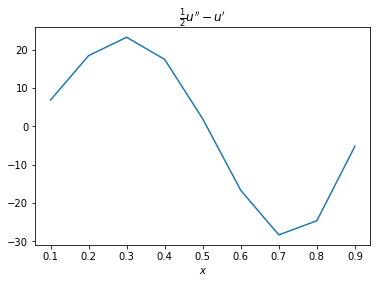

In [2]:
# define function u, domain, stepsize
u = lambda x: np.sin((x + np.pi)**2 - 1)
a,b,n = 0,1,10
x = np.linspace(a,b,n+1)
h = x[1] - x[0]
uX = u(x)

# calculating the first derivative
diag = np.diag(np.ones(n-2), 1) + np.diag(np.ones(n-2)*-1, -1)
adjust = np.zeros(n-1)
adjust[0] = -1*uX[0]/(2*h)
adjust[-1] = uX[-1]/(2*h)
uprime = (1./(2*h))*diag@uX[1:-1] + adjust

# calculating the second derivative
diag = diag + np.diag(np.ones(n-1)*-2) + np.diag(np.ones(n-2)*2, -1)
adjust[0] = -1*adjust[0]
adjust = adjust * 2 * (1./h)
udoubleprime = (1./(h**2))*diag@uX[1:-1] + adjust

# plot that lil fella
plt.plot(x[1:-1], .5*udoubleprime - uprime)
plt.rc('text', usetex=True)
plt.title(r"$\frac{1}{2}u'' - u'$")
plt.xlabel(r'$x$')
plt.rc('text', usetex=False)
plt.show()

# Problem 2

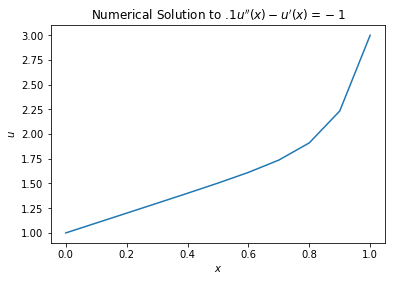

In [3]:
# eps*u" - u' = f(x) := -1 for x in (0,1)
alpha, beta, epsilon = 1, 3, .1
a,b,n = 0,1,10
x = np.linspace(a,b,n+1)
h = x[1] - x[0]

diag = np.diag(np.ones(n-2),1)*(epsilon - .5*h) \
        + np.diag(np.ones(n-1))*-2*epsilon \
        + np.diag(np.ones(n-2),-1)*(epsilon + .5*h)
diag = diag*(1./(h**2))
b = np.ones(n-1)*-1
b[0] = b[0] - alpha*((epsilon + h*.5)/(h**2))
b[-1] = b[-1] - beta*((epsilon - h*.5)/(h**2))
Usub = la.solve(diag, b)
U = np.ones(n+1)
U[1:-1] = Usub
U[0] = alpha
U[-1] = beta

plt.plot(x, U)
plt.rc('text', usetex=True)
plt.title(r"Numerical Solution to $.1u''(x) - u'(x) = -1$")
plt.xlabel(r'$x$')
plt.ylabel(r'$u$')
plt.rc('text', usetex=False)
plt.plot()
plt.show()

In [4]:
def bvp(func, epsilon, alpha, beta, N):
    a,b,n = 0, 1, N
    x = np.linspace(a,b,n+1)
    h = x[1] - x[0]
    diag = np.diag(np.ones(n-2),1)*(epsilon - .5*h) \
            + np.diag(np.ones(n-1))*-2*epsilon \
            + np.diag(np.ones(n-2),-1)*(epsilon + .5*h)
    diag = diag*(1./(h**2))
    b = func(x[1:-1])
    b[0] = b[0] - alpha*((epsilon + h*.5)/(h**2))
    b[-1] = b[-1] - beta*((epsilon - h*.5)/(h**2))
    Uinterior = la.solve(diag, b)
    U = np.ones(n+1)
    U[1:-1] = Uinterior
    U[0] = alpha
    U[-1] = beta
    return U

num_approx = 10 # Number of Approximations
N = 5*np.array([2**j for j in range(num_approx)])
h, max_error = (1.-0)/N[:-1], np.ones(num_approx-1)

# Best numerical solution, used to approximate the true solution.
# bvp returns the grid, and the grid function, approximating the solution
# with N subintervals of equal length.
f = lambda x: np.ones_like(x)*-1
num_sol_best = bvp(f, epsilon=.1, alpha=1, beta=3, N=N[-1])
for j in range(len(N)-1):
    num_sol = bvp(lambda x:-1, epsilon=.1, alpha=1, beta=3, N=N[j])
    max_error[j] = np.max(np.abs(num_sol-num_sol_best[::2**(num_approx-j-1)]))
plt.loglog(h,max_error,'.-r',label="$E(h)$")
plt.loglog(h,h**(2.),'-k',label="$h^{\, 2}$")
plt.xlabel("$h$")
plt.legend(loc='best')
plt.show()
print("The order of the finite difference approximation is about ",
      (np.log(max_error[0])-np.log(max_error[-1]))/(np.log(h[0])-np.log(h[-1])),
      ".")

TypeError: 'int' object is not subscriptable